In [11]:
import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [7]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def tanh(x):
    y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    return y

def relu(x):
    

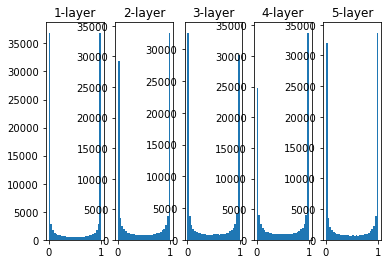

In [4]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i!=0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1
    
    z = np.dot(x,w)
    a = sigmoid(z)
    activations[i] = a
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

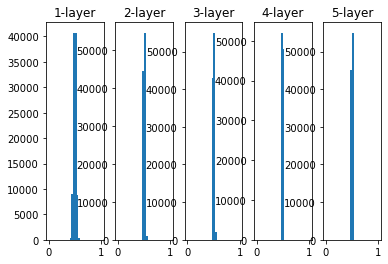

In [5]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i!=0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 0.01
    
    z = np.dot(x,w)
    a = sigmoid(z)
    activations[i] = a
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

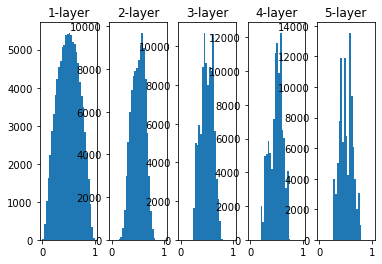

In [9]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i!=0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    
    z = np.dot(x,w)
    a = sigmoid(z)
    activations[i] = a
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

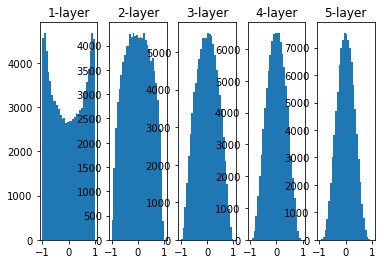

In [10]:
x = np.random.randn(1000,100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i!=0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    
    z = np.dot(x,w)
    a = tanh(z)
    activations[i] = a
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

In [12]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He':'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100,100,100,100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

In [13]:
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
        
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
        
    if i % 100 == 0:
        print("==========" + "iteration:" + str(i) + "==========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


==========iteration:0==========
std=0.01:2.3025352423397574
Xavier:2.2984673796962225
He:2.4555051995990302
==========iteration:100==========
std=0.01:2.302122766197559
Xavier:2.243485886506279
He:1.3294488581035768
==========iteration:200==========
std=0.01:2.3035012681123352
Xavier:2.1065716542760153
He:0.7453382155657322
==========iteration:300==========
std=0.01:2.3025742489145262
Xavier:1.79108834515057
He:0.5316837693445208
==========iteration:400==========
std=0.01:2.3019525890275103
Xavier:1.2875280574385233
He:0.4571871120439578
==========iteration:500==========
std=0.01:2.3051069416240617
Xavier:0.8410516988792802
He:0.4772587164960629
==========iteration:600==========
std=0.01:2.3017857437115636
Xavier:0.6029868580658131
He:0.28906028710173914
==========iteration:700==========
std=0.01:2.301915956630473
Xavier:0.5007434351939544
He:0.3084249757829858
==========iteration:800==========
std=0.01:2.303008662082169
Xavier:0.5674469404210312
He:0.35370079057804427
==========iterat

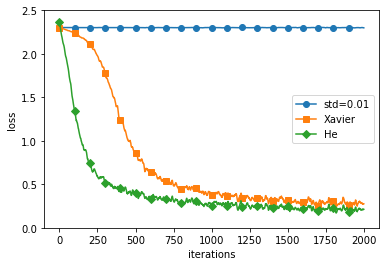

In [14]:
markers = {'std=0.01':'o', 'Xavier':'s', 'He':'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()